 ### PROJECT NAME :- GOLD PRICE PREDICTION.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv("gold_price.csv")

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

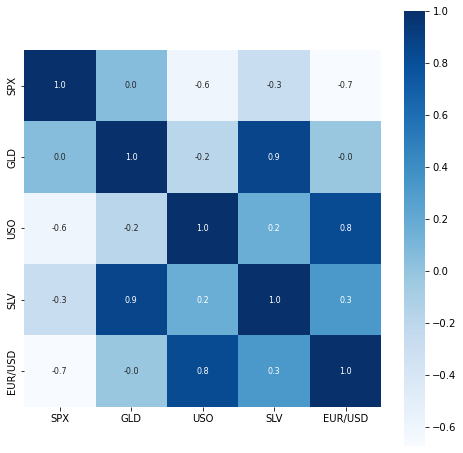

In [10]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\TEJAS V WARVANTE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

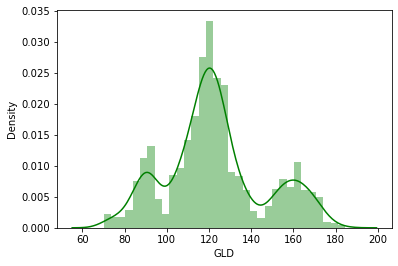

In [12]:
sns.distplot(gold_data['GLD'],color='green')

In [13]:
x = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [16]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state=2)

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(x_train,Y_train)

RandomForestRegressor()

In [19]:
test_data_prediction = regressor.predict(x_test)

In [20]:
print(test_data_prediction)

[168.58989947  82.03009978 115.95760034 127.6814008  120.80910086
 154.51699841 150.55969755 126.17040029 117.46009861 125.98090056
 116.69450099 171.78480083 141.83449819 167.87619839 115.10980009
 117.56970046 138.78940262 170.29550114 159.64110352 160.77989979
 155.09120032 125.23989997 176.28529945 157.00870347 125.1469005
  93.6595996   77.01810006 120.58330005 119.05239928 167.61569946
  88.16640011 125.39990007  91.03490087 117.64220025 121.02669942
 136.15230109 115.59370141 115.08000093 148.6502992  107.12500122
 104.07400239  87.35469811 126.39250032 117.99740017 153.10419942
 119.54370003 108.28820027 108.06269803  93.22120074 127.14899755
  74.45100062 113.65449957 121.3951001  111.15599914 118.92839873
 120.72649902 159.34299922 167.36000135 147.04019684  85.99359886
  94.22300046  86.94149878  90.69460004 118.93480095 126.47270057
 127.51769984 169.30950019 122.21259959 117.30199894  98.6310005
 168.89930166 143.1259989  132.25260305 121.14900226 121.08419937
 119.5325005

In [21]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989331450325485


In [22]:
Y_test = list(Y_test)

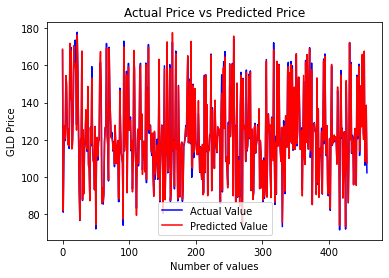

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()